# Lab 9: Supervised Learning: decision trees and beyond  

In this lab, we will keep working on supervised learning. In the previous two labs we learned how to train kNN and decision tree predictors and how to estimate their accuracy. In this lab, we will learn how to train more types of predictors and we will compare performance of a variety of predictors on several data sets.

The following code is copied from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py. You should be able to run the code without error messages.

C:\Users\Hoang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Hoang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Hoang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


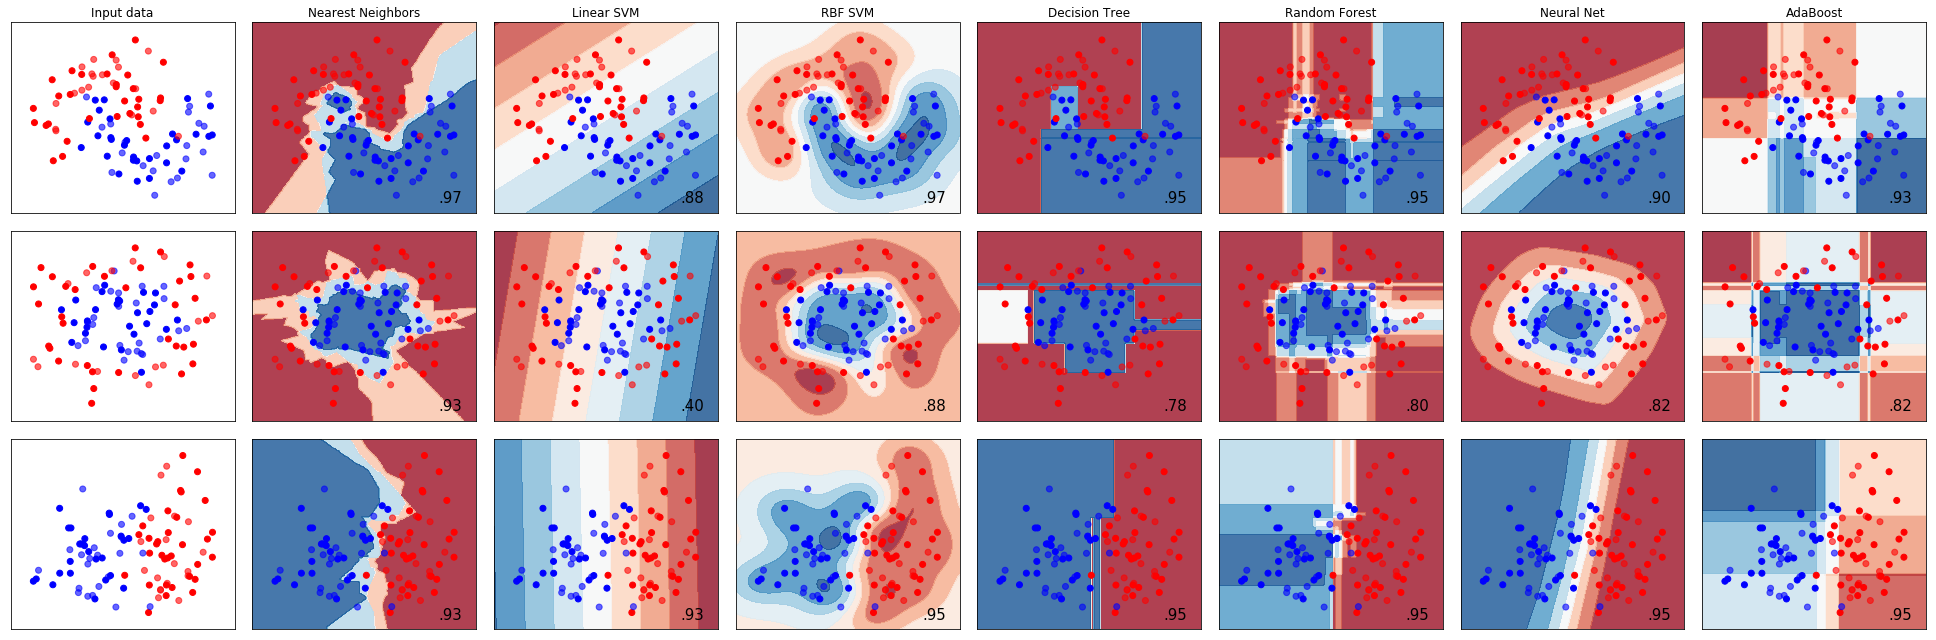

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

The code above trained several types of predictors on 3 synthetic data sets. Among them are kNN and decision tree classifiers. In addition to that, we have SVC, which is called the support vecor machine, and MLPClassifier, which is called the feedforward neural network. In this list, we also have 2 algorithms that are related to decision trees:
- RandomForestClassifier. This one builds a number of decision trees (called an ensemble) on different subsets of training data. Then, the final prediction is based on the majority vote of the decision trees.
- AdaBoostClassifier. This is another method that also builds an ensemble of decision trees and uses their voting for the final prediction.

**Question 1**. Study the code and try to understand each line. In particular, pay attention to how easy it is to train predictors of different types.

**Question 2**. Train all the listed classifiers on Iris data and test their accuracy. Report and discuss the results

**Question 3**. Play with the hyperparameters of each of the algorithms. Try to improve the accuracy on the test data. For example, in RandomForestClassifier and AdaBoostClassifier you can select how many decision trees you have in an ensemble. Experience shows that the more trees the better, but the price to pay is an increased time to train and use such predictors. NOTE: *The more effort you put into this task, the more points you will get. It is possible to get extra points on this question.*

**Question 4**. Apply the RandomForestClassifier and AdaBoostClassifier on Churn data from Lab 8. See if the prediction accuracy could be improved.

**Question 5**. Perform the exploratory data analysis of  the Adult Data Set from http://archive.ics.uci.edu/ml/datasets/Adult. Train and estimate accuracy of all of all the classifiers from Question 1. Note that you will have to preprocess your data set before training. Explain all the preprocessing steps you applied and report on the accuracy on test data. Report all EDA and classification results in a 1-page document.

**Question 6**. Perform the exploratory data analysis of  the Adult Data Set from http://archive.ics.uci.edu/ml/datasets/Abalone. Train and estimate accuracy of all of all the classifiers from Question 1. Note that you will have to preprocess your data set before training. Explain all the preprocessing steps you applied and report on the accuracy on test data. Report all EDA and classification results in a 1-page document.


### Question 2

In [2]:
from sklearn import datasets
%matplotlib inline

(1.8701433691756268,
 4.529856630824372,
 0.68982339955849881,
 7.2101766004415015)

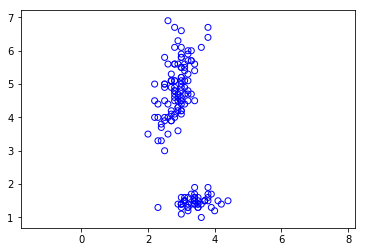

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 1], X[:, 2], facecolors = 'none', color = 'blue')
plt.axis('equal')

In [4]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)
for name, clf in zip(names, classifiers): 
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("classifier", name, "score", score)

classifier Nearest Neighbors score 0.977777777778
classifier Linear SVM score 0.911111111111
classifier RBF SVM score 0.977777777778
classifier Decision Tree score 0.977777777778
classifier Random Forest score 0.955555555556
classifier Neural Net score 0.977777777778
classifier AdaBoost score 0.911111111111


C:\Users\Hoang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Question 3

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
params_DT = {"criterion": ["gini", "entropy"], "max_depth": [5,10], "min_samples_leaf": [1,5,10]}
DTclf = GridSearchCV(DecisionTreeClassifier(), params_DT)
params_RF = {"n_estimators": [10,15,20], "criterion": ["gini", "entropy"], "max_depth": [5,10]}
RFclf = GridSearchCV(RandomForestClassifier(), params_RF)
params_AB = {"n_estimators": [50,100,150]}
AdaBoostclf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5)), params_AB)
classifiers = [KNeighborsClassifier(3),
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=1),
               DTclf, RFclf,
               MLPClassifier(alpha=1), AdaBoostclf]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)
for name, clf in zip(names, classifiers): 
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("classifier", name, "score", score)

classifier Nearest Neighbors score 0.977777777778
classifier Linear SVM score 0.911111111111
classifier RBF SVM score 0.977777777778
classifier Decision Tree score 0.977777777778
classifier Random Forest score 0.977777777778
classifier Neural Net score 0.977777777778
classifier AdaBoost score 0.977777777778


C:\Users\Hoang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Question 4

In [8]:
import pandas as pd
dfchurn = pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
dfchurn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [10]:
dfchurn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [11]:
dfchurn["Int\'l Plan"] = (dfchurn["Int\'l Plan"] == "yes").astype(int)
dfchurn["VMail Plan"] = (dfchurn["VMail Plan"] == "yes").astype(int)
result = np.where(dfchurn["Churn?"] == "True.", 1, 0)
dfchurn["result"] = result
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,result
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


In [12]:
import random

In [13]:
todrop = ["State", "Area Code", "Phone", "Churn?"]
data = dfchurn.drop(todrop, axis = 1)
testIndex = random.sample(range(len(data)), 1000)
X_test = data.iloc[testIndex].as_matrix()[:,:-1].astype(np.float)
y_test = data.iloc[testIndex].as_matrix()[:,-1]
X_train = data[~data.index.isin(testIndex)].as_matrix()[:,:-1].astype(np.float)
y_train = data[~data.index.isin(testIndex)].as_matrix()[:,-1]

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 17), (1000, 17), (2333,), (1000,))

In [15]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [22]:
params_neighbors = {"metric": ["euclidean", "minkowski", "cosine", "chebyshev", "canberra", "braycurtis"],\
                    "n_neighbors": [5,10,15,20,25], "weights": ["uniform", "distance"]}
KNNclf = GridSearchCV(KNeighborsClassifier(), params_neighbors)
params_DT = {"criterion": ["gini", "entropy"], "max_depth": [5,10,15,20,25], "min_samples_leaf": [1,5,10,15,20]}
DTclf = GridSearchCV(DecisionTreeClassifier(), params_DT)
params_RF = {"n_estimators": [10,15,20,25,50], "criterion": ["gini", "entropy"], "max_depth": [5,10,15,20,25]}
RFclf = GridSearchCV(RandomForestClassifier(), params_RF)
params_AB = {"n_estimators": [50,100,150,200]}
AdaBoostclf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 20)), params_AB)
classifiers = [KNNclf,
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=1),
               DTclf, RFclf,
               MLPClassifier(alpha=1), AdaBoostclf]

In [23]:
for name, clf in zip(names, classifiers): 
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("classifier", name, "score", score)

classifier Nearest Neighbors score 0.897
classifier Linear SVM score 0.839
classifier RBF SVM score 0.839
classifier Decision Tree score 0.936
classifier Random Forest score 0.936
classifier Neural Net score 0.91
classifier AdaBoost score 0.899
